In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Cifar10.zip -d /content/drive/MyDrive/Cifar10

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/drive/MyDrive/Cifar10/truck/i01001.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01002.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01003.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01004.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01005.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01006.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01007.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01008.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01009.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01010.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01011.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01012.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01013.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01014.jpg  
  inflating: /content/drive/MyDrive/Cifar10/truck/i01015.jpg  
  inflating: /conte

In [4]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils

from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
groups_folder_path = '/content/drive/MyDrive/Cifar10/'
categories = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

num_classes = len(categories)

import cv2
import os

image_w = 32
image_h = 32

X = []
Y = []

for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path + categorie + '/'

    for top, dir, f in os.walk(image_dir):
        for filename in f:
            #print(image_dir+filename) 
            img = cv2.imread(image_dir+filename) #imread : 파일 하나 읽어주기
            img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1]) # 여기서 normalizing해줌
            X.append(img/255)
            Y.append(label)
 

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(60000, 32, 32, 3)
(60000, 10)


In [6]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from keras.models import load_model
from sklearn.model_selection import train_test_split


X_train_data, X_test_data, Y_train_label, Y_test_label = train_test_split(X,Y, stratify=Y) #stratify를 통해서 한 쪽에 쏠려서 분배되는 것을 방지
xy = (X_train_data, X_test_data, Y_train_label, Y_test_label)

np.save("./img_data.npy", xy) # train과 test set으로 나누어진 파일을 numpy 파일에 넣어줌
X_train_data.shape, X_test_data.shape, Y_train_label.shape, Y_test_label.shape

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


((45000, 32, 32, 3), (15000, 32, 32, 3), (45000, 10), (15000, 10))

In [7]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

input_layer = layers.Input((32, 32, 3))

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (32, 32, 3),
                        kernel_size = (4,4), 
                        filters = 32),
                        
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(input_shape = (32, 32, 3),
                        activation = "relu",
                        kernel_size = (4,4), 
                        filters = 32),

    keras.layers.Conv2D(kernel_size = (4,4), 
                        activation = "relu",
                        filters = 32),
    keras.layers.BatchNormalization(), 
     keras.layers.MaxPooling2D((2, 2)), # maxpooling크기 변경 / stride 변경 #커널사이즈, 보폭
     keras.layers.Dropout(rate=0.4),
  #mB1

  #b3 start
     keras.layers.Conv2D(kernel_size = (3,3), padding ='same', activation = "relu",
                        filters = 128),
     keras.layers.BatchNormalization(),
     keras.layers.Conv2D(kernel_size = (3,3), padding ='same', activation = "relu", dilation_rate=2,
                        filters = 256),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(rate=0.4),

    #b4 start
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu",
                        filters = 128),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu",
                        filters = 256),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),

    #b5 start
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu", dilation_rate=2,
                        filters = 128),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu", dilation_rate=3,
                        filters = 128),

    #b6
    keras.layers.Conv2D(kernel_size = (5,5), padding = 'same', activation="relu",
                        filters = 128),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (5,5), padding = 'same', activation="relu",
                        filters = 256),

    #b7
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu",
                        filters = 128),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (5,5), padding = 'same', activation="relu",
                        filters = 128),
    keras.layers.Dropout(rate=0.4),

    #b8
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu",
                        filters = 128),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu",dilation_rate=2,
                        filters = 256),
    #mB8 = layers.add([mB3Pool, mB5, mB7, mB8], name="B8_Add")
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),

    #B9
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu",
                        filters = 256),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu",dilation_rate=2,
                        filters = 256),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(rate=0.4),

    #B10
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', activation="relu",
                        filters = 512),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),


    #keras.layers.Flatten(),
    #keras.layers.Dense(128, activation = 'relu'),
    #keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 batch_normalization (BatchN  (None, 29, 29, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        16416     
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 32)        16416     
                                                                 
 batch_normalization_1 (Batc  (None, 23, 23, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0

In [10]:
model.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=["accuracy"],
)

In [11]:
history = model.fit(
    X_train_data, Y_train_label,
    validation_data=(X_test_data, Y_test_label),
    batch_size=256,
    epochs=50
)

Epoch 1/50
176/176 [==============================] - 73s 321ms/step - loss: 2.0056 - accuracy: 0.2398 - val_loss: 2.8205 - val_accuracy: 0.1023
Epoch 2/50
176/176 [==============================] - 51s 291ms/step - loss: 1.5821 - accuracy: 0.4027 - val_loss: 2.9068 - val_accuracy: 0.1970
Epoch 3/50
176/176 [==============================] - 51s 291ms/step - loss: 1.3707 - accuracy: 0.5065 - val_loss: 2.0179 - val_accuracy: 0.4251
Epoch 4/50
176/176 [==============================] - 51s 291ms/step - loss: 1.2577 - accuracy: 0.5561 - val_loss: 1.6513 - val_accuracy: 0.5131
Epoch 5/50
176/176 [==============================] - 51s 291ms/step - loss: 1.1093 - accuracy: 0.6098 - val_loss: 1.5097 - val_accuracy: 0.5391
Epoch 6/50
176/176 [==============================] - 51s 291ms/step - loss: 1.0144 - accuracy: 0.6431 - val_loss: 1.7465 - val_accuracy: 0.5627
Epoch 7/50
176/176 [==============================] - 51s 291ms/step - loss: 0.9240 - accuracy: 0.6797 - val_loss: 1.1634 - val_ac

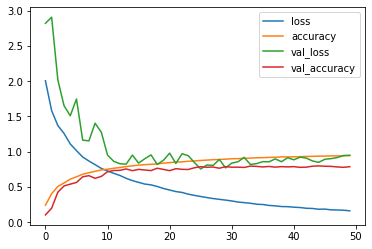

In [12]:
pd.DataFrame(history.history).plot()
# batch normalization 2개에 하나씩 사용한 결과

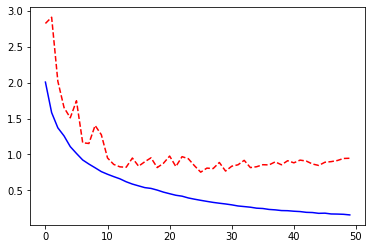

In [13]:
plt.plot(history.history['loss'], 'b-') # 파란선 : 훈련용 데이터에 대한 손실
plt.plot(history.history['val_loss'], 'r--') # 빨간선 : 검증용 데이터에 대한 손실

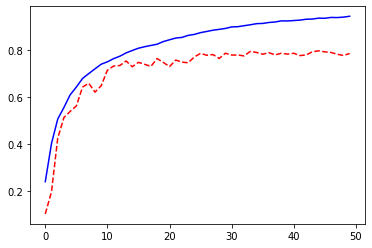

In [14]:
plt.plot(history.history['accuracy'], 'b-') # 파란선 : 훈련용 데이터에 대한 정확도
plt.plot(history.history['val_accuracy'], 'r--') # 빨간선 : 검증용 데이터에 대한 정확도

In [18]:
randldx = np.random.randint(0,1000)

images = X_test_data[randldx:randldx+100] # 예측레이블 100개 생성
predictions = np.argmax(model.predict(images), axis = 1)
print(predictions)


[6 8 6 1 3 4 9 6 2 3 8 9 3 4 1 1 1 6 9 1 9 5 2 2 9 0 4 1 8 6 1 2 7 0 5 6 8
 5 3 5 0 5 7 4 4 3 1 4 1 1 5 4 0 4 7 7 2 3 6 1 6 0 2 3 8 2 3 5 0 7 3 3 1 9
 5 5 1 8 5 6 7 8 0 1 1 5 9 7 1 7 3 5 0 2 8 1 5 1 5 3]


In [19]:
def plot_images(images, labels, images_per_row=10):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row,
                        figsize = (images_per_row * 2, n_rows * 2))
 for i in range(n_rows):
     for j in range(images_per_row):
         if i*images_per_row + j >= n_images: break
         img_idx = i*images_per_row + j
         a_image = images[img_idx].reshape(32,32)
         if n_rows>1: axis = ax[i, j]
         else: axis = ax[j]
         axis.get_xaxis().set_visible(False)
         axis.get_yaxis().set_visible(False)
         label = class_names[labels[img_idx]]
         axis.set_title(label)
         axis.imshow(a_image, interpolation='nearest')

ValueError: ignored

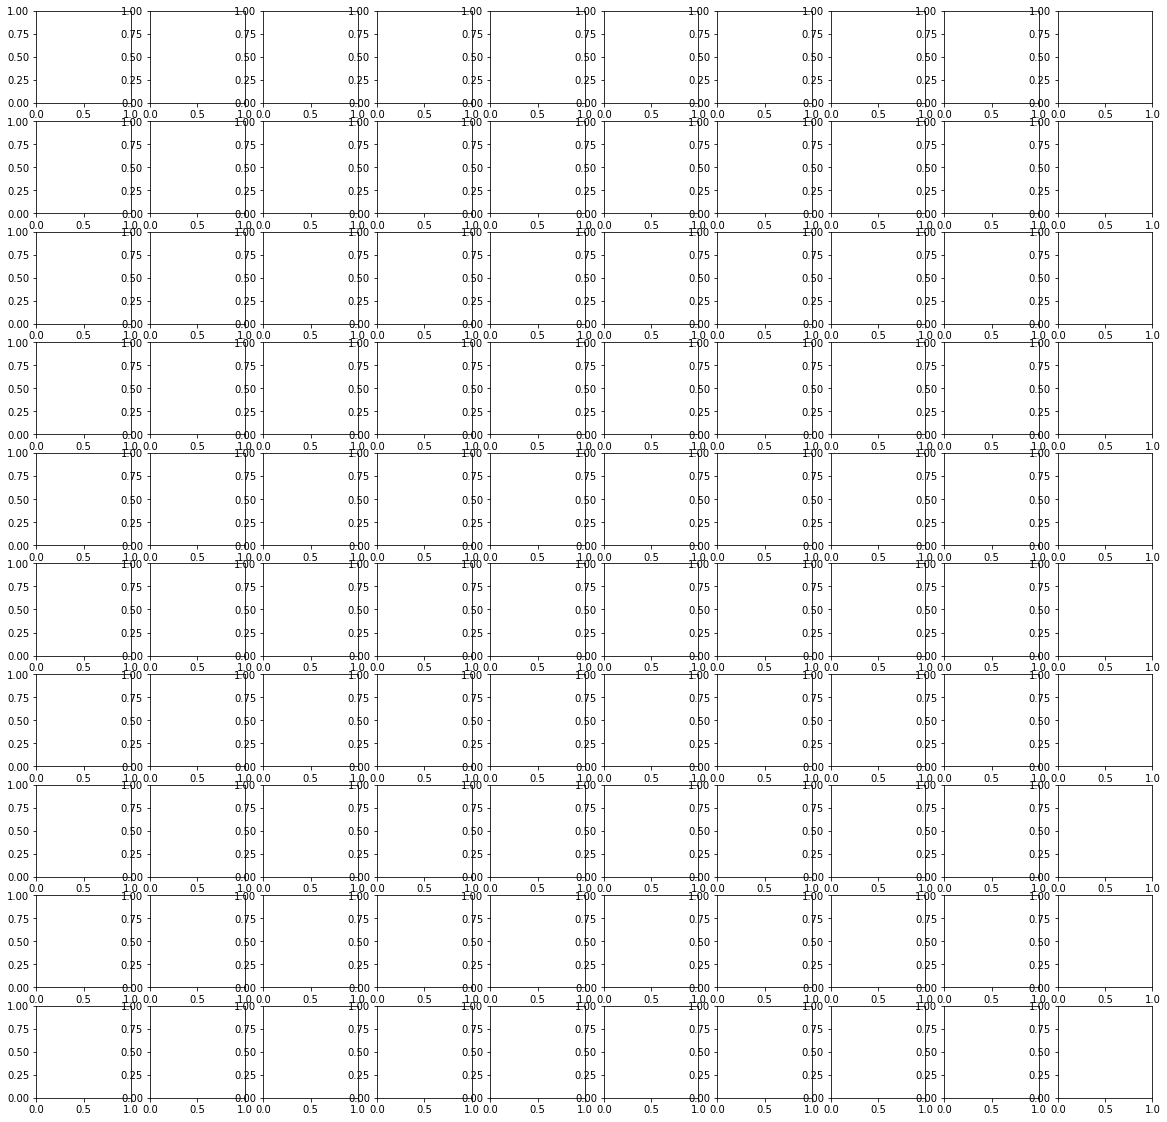

In [20]:
plot_images(images, predictions, images_per_row = 10) # 예측능력 확인

In [ ]:
images = X_train_data[randldx:randldx+100] # 예측레이블 100개 생성
predictions = np.argmax(model.predict(images), axis = 1)

plot_images(images, predictions, images_per_row = 10) # 예측능력 확인